In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [15]:
N_x = 8
N_y = 2
N = N_y * N_x
M=10000

In [16]:
V_mean = np.random.randint(-10, 10, size=(N_y, N_x))
x = np.random.randint(-10, 10, size=(N_x,))
y = np.random.randint(-1, 1, size=(N_y,))


In [24]:
def slackness(N, V_mean, M, N_x, N_y, sigma, x, y, tol=1e-2):
    predictors = np.random.multivariate_normal(V_mean.reshape(N), sigma**2*np.eye(N), size=M).reshape(M, N_y, N_x)
    mean_pred = V_mean.dot(x)
    y_pred = predictors.dot(x)
    res_norm = norm(y-y_pred, axis=1)
    res_norm_expectation = res_norm.mean()
    mean_norm = norm(y-mean_pred)
    left = res_norm_expectation
    right = np.sqrt(mean_norm ** 2 + sigma ** 2 * N_y * norm(x) ** 2)
    if left >= right + tol:
        return None
    else:
        return left, right, np.abs(right-left)/right

In [25]:
h = []
sigmas=np.logspace(-3, 3, 100)
for sigma in sigmas:
    a = slackness(N, V_mean, M, N_x, N_y, sigma, x, y)
    if a is None:
        h.append(0)
    else:
        h.append(a[-1])

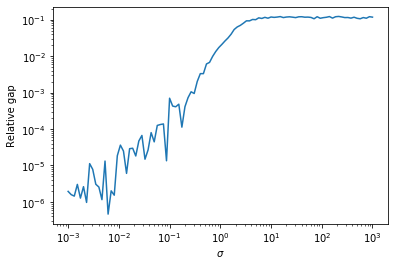

In [26]:
plt.loglog(sigmas, h)
plt.xlabel(r"$\sigma$")
plt.ylabel("Relative gap")
plt.savefig("relaxation-gap.png", dpi=400
        )